# Online News Popularity - Dealing with outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats.mstats import winsorize

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Loading data
onlinenews = pd.read_csv('OnlineNewsPopularity.csv')

#Removing blanks from column names
for col in onlinenews.columns:
    onlinenews.rename(columns={col:col.replace(" ", "")},inplace=True)


onlinenews.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Finding Outliers

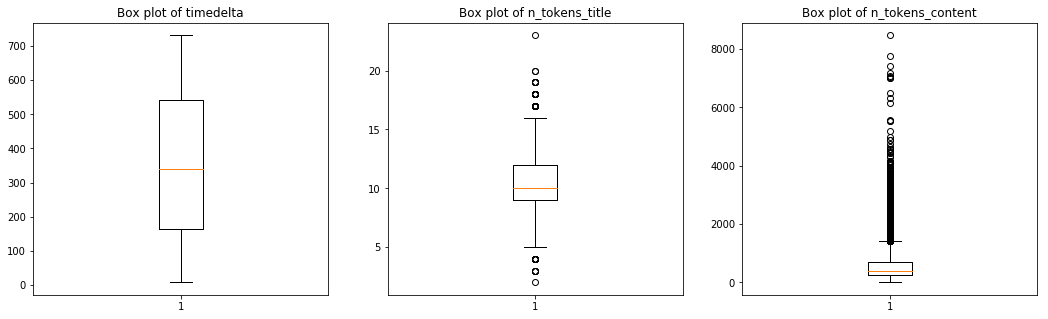

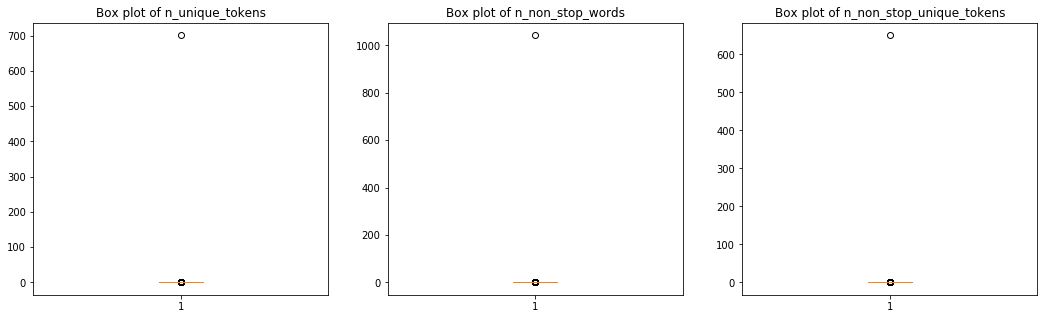

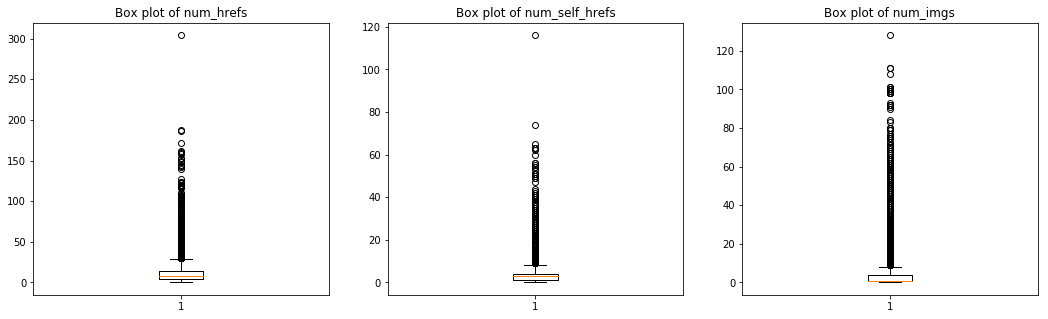

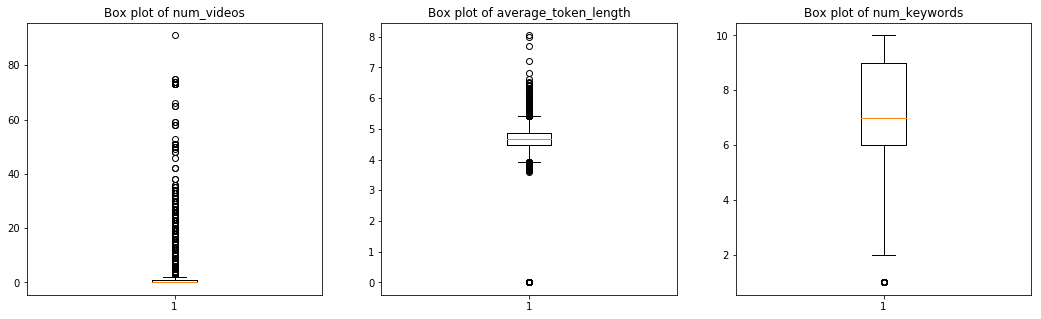

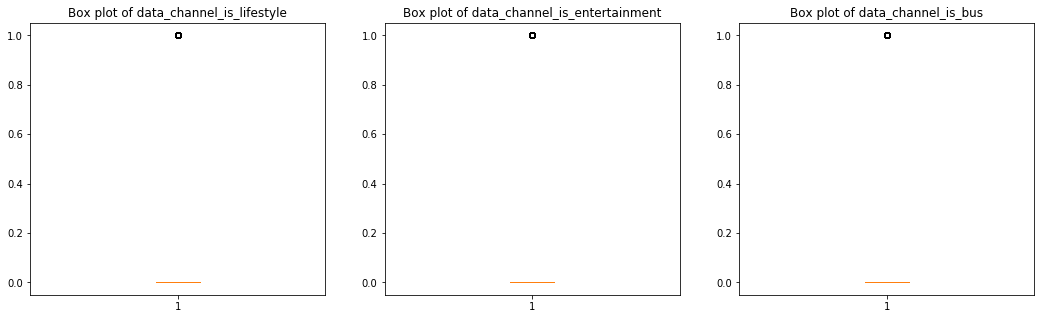

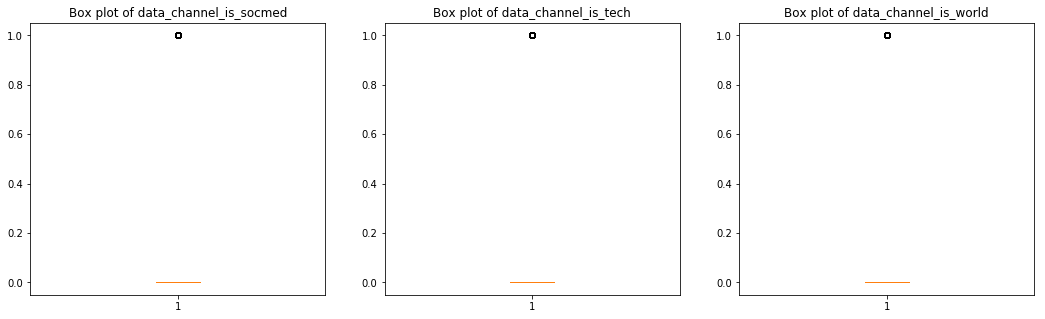

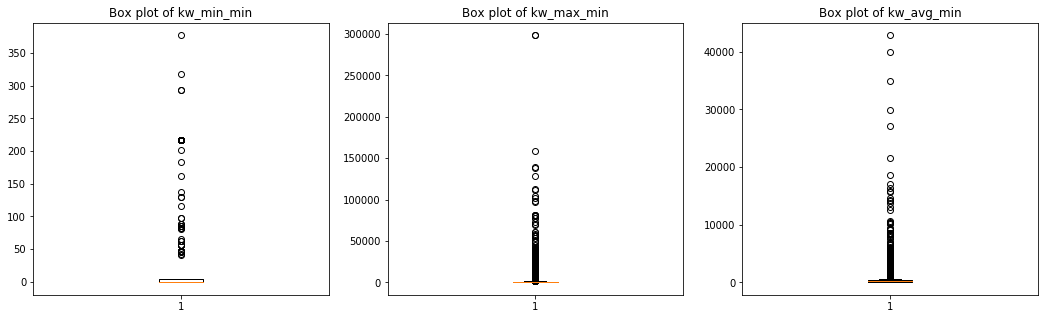

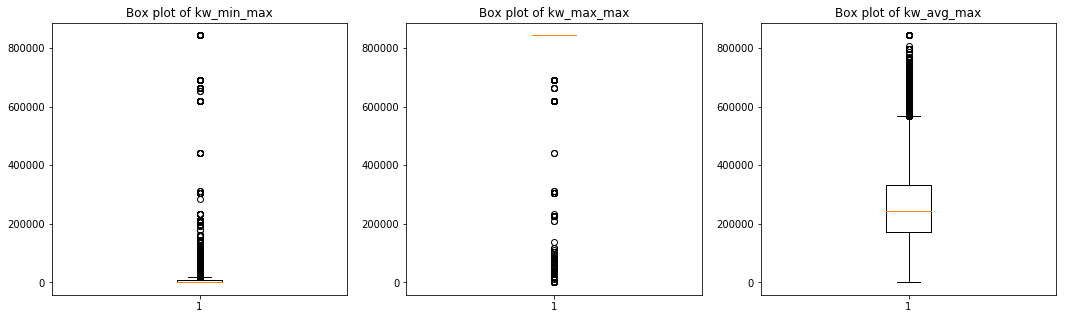

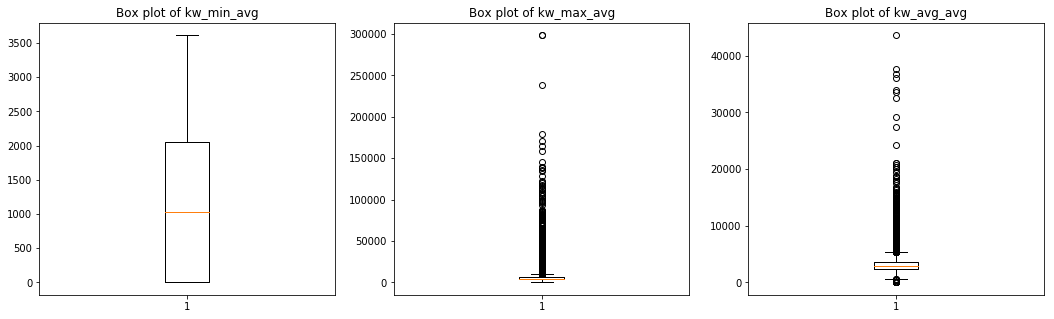

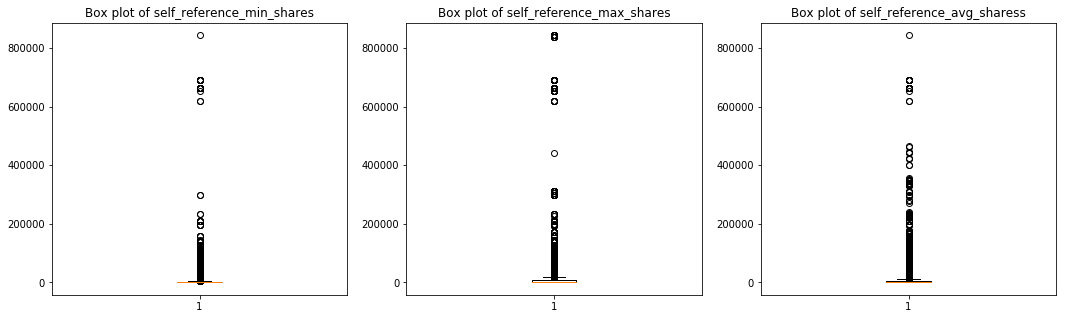

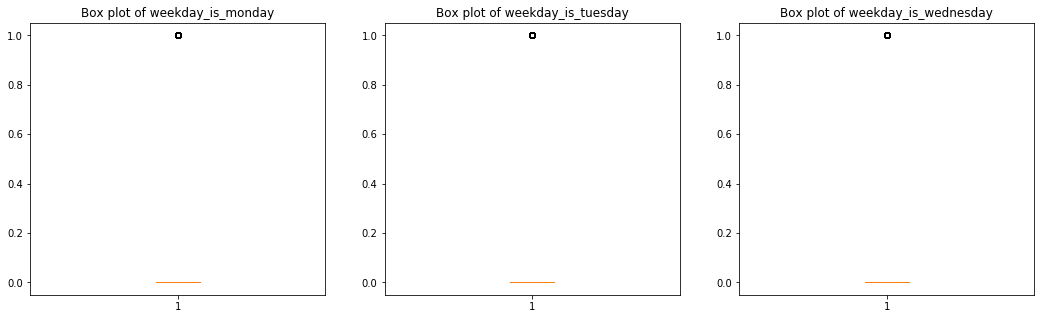

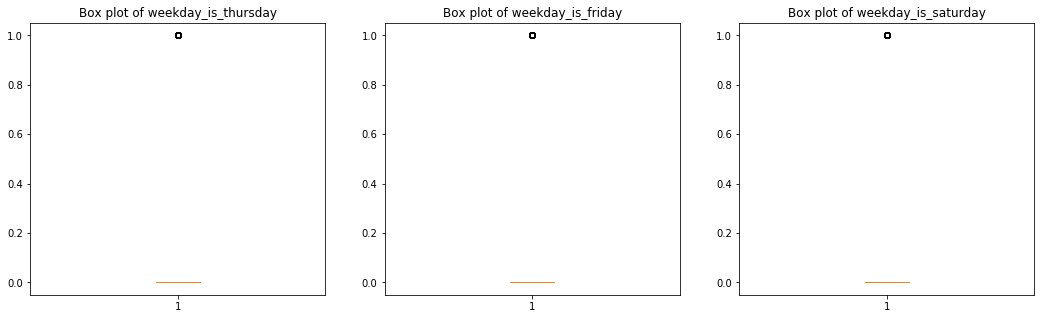

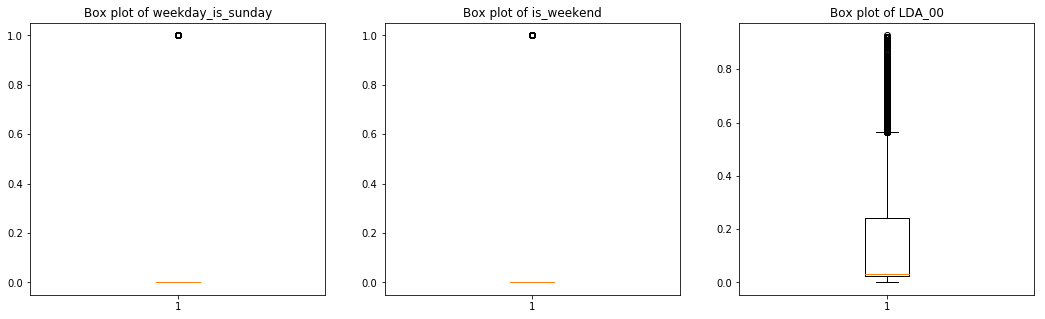

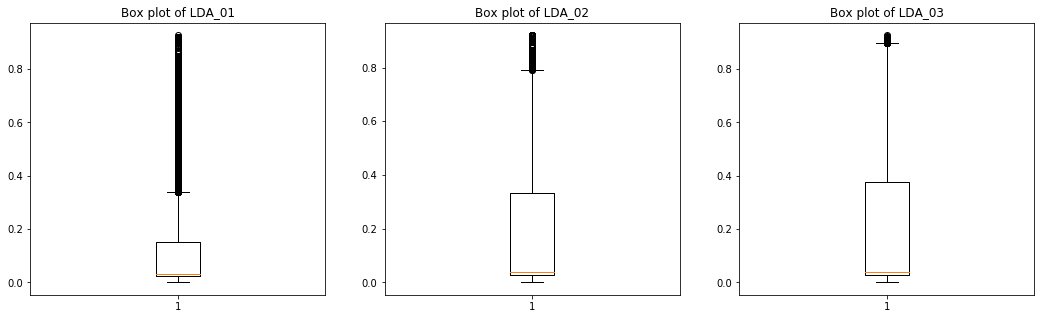

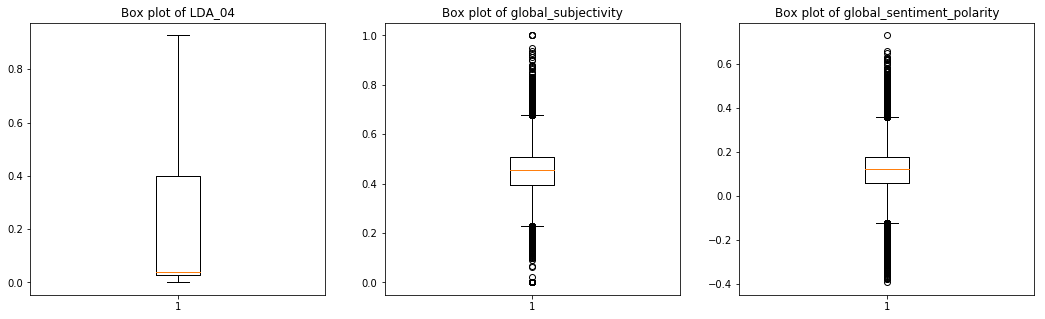

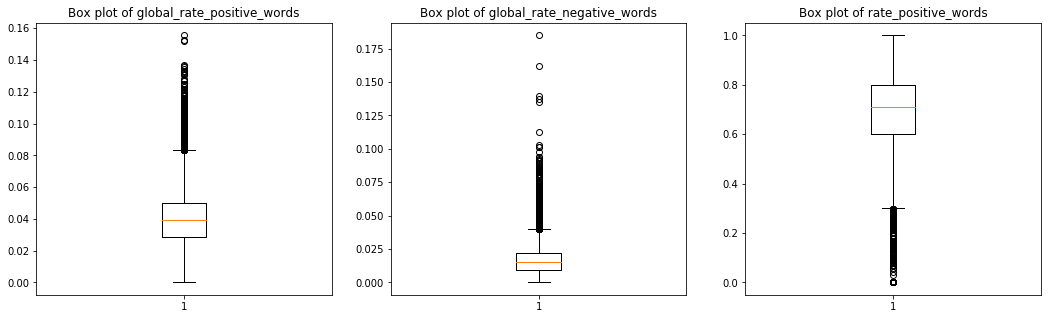

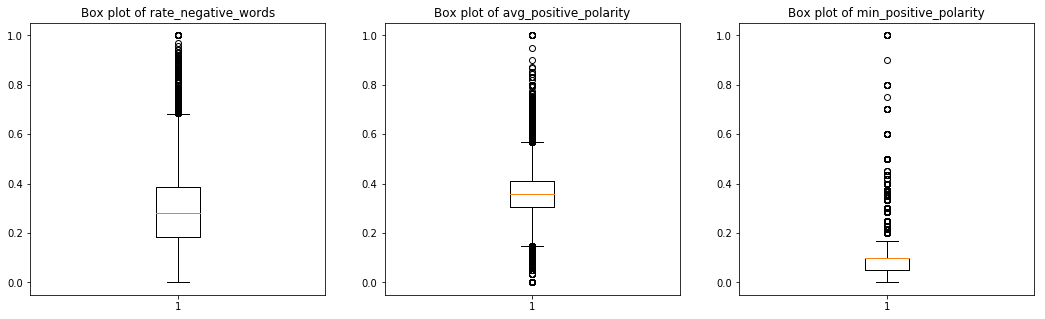

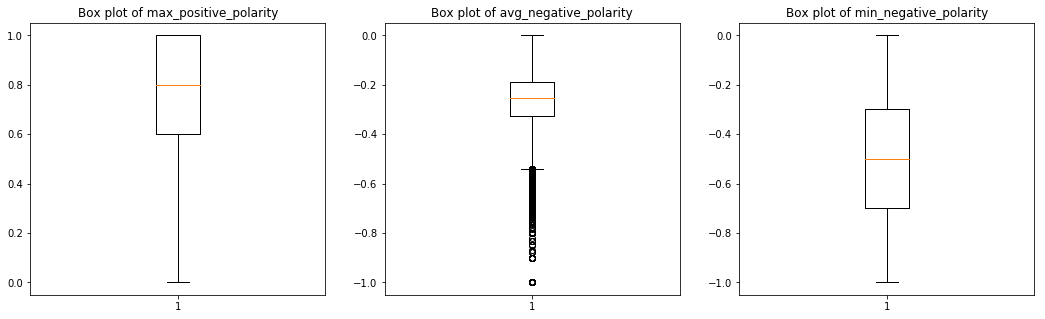

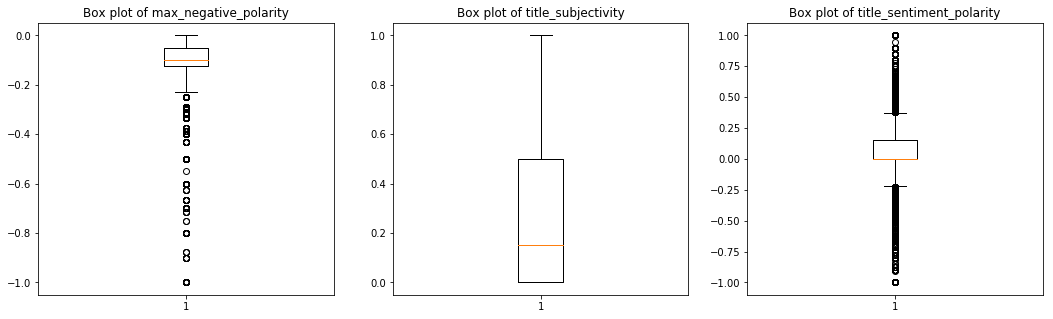

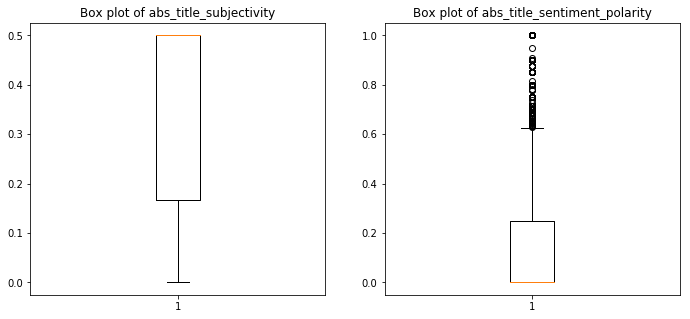

In [3]:
#Visually detecting outliers

cols = onlinenews.drop(['url','shares'], axis=1).columns

i=0

while i < len(cols):

    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.boxplot(onlinenews[cols[i]])
    title = 'Box plot of ' + str(cols[i])
    plt.title(title)
    
    
    if i+1 < len(cols):
        plt.subplot(1,3,2)
        plt.boxplot(onlinenews[cols[i+1]])
        title = 'Box plot of ' +  str(cols[i+1])
        plt.title(title)

    if i+2 < len(cols):
        plt.subplot(1,3,3)
        plt.boxplot(onlinenews[cols[i+2]])
        title = 'Box plot of ' +  str(cols[i+2])
        plt.title(title)

    i+=3
    
plt.show()




In [4]:
#Function to create a list of variables with outliers

def outliersinColumns(df):

    '''
    function: outliersinColumns verifies if there is a True value into de dataset to indicate there is an
              outlier in a specific column
    arguments: A dataframe with boolean values
    return: A list of columns with outliers
    '''
    
    columns_outliers = []
    for column in df.columns:

        if onlinenews[column].nunique() > 2:  #Apply for variables with 3 or more unique values

            for value in df[column]:
                if value:
                    columns_outliers.append(column)
                    break

    return columns_outliers



In [5]:
#Using a statistical method to detect outliers: interquartile range (IQR)

Q1 = onlinenews.quantile(0.25)
Q3 = onlinenews.quantile(0.75)
IQR = Q3 - Q1


#Creating a dataframe with boolean values
#False that means these values are valid whereas 
#True indicates presence of an outlier

notinvalidarea = (onlinenews.drop(['url'], axis=1) < (Q1 - 1.5 * IQR)) | (onlinenews.drop(['url'], axis=1) > (Q3 + 1.5 * IQR))


#Calling function outliersinColumns
columns_w_outliers = outliersinColumns(notinvalidarea)


#Printing Results
print('Columns with outliers: {}'.format(len(columns_w_outliers)))
print('\n')
print(columns_w_outliers)


Columns with outliers: 39


['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'avg_negative_polarity', 'max_negative_polarity', 'title_sentiment_polarity', 'abs_title_sentiment_polarity', 'shares']


### Using boxplots to identify the best technique to deal with outliers

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1874: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1881: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1889: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/anaconda

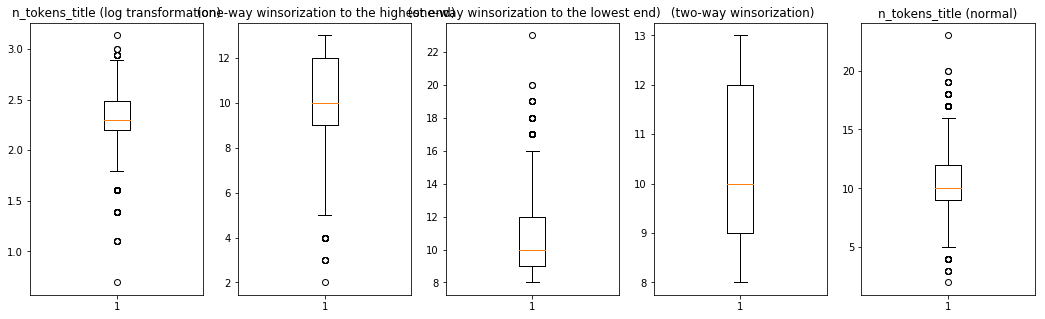

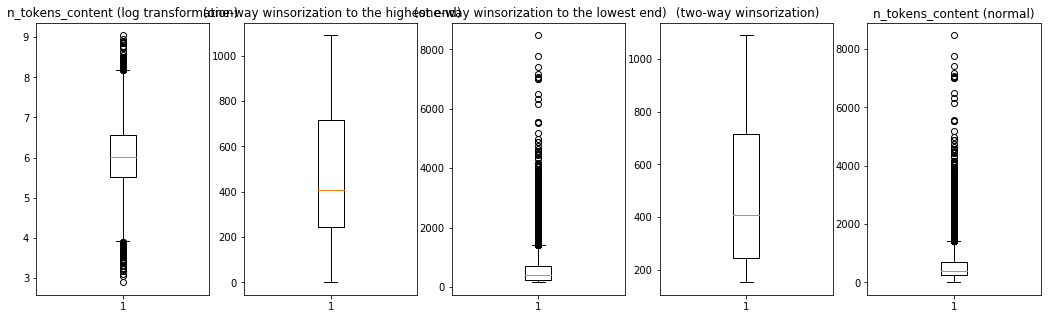

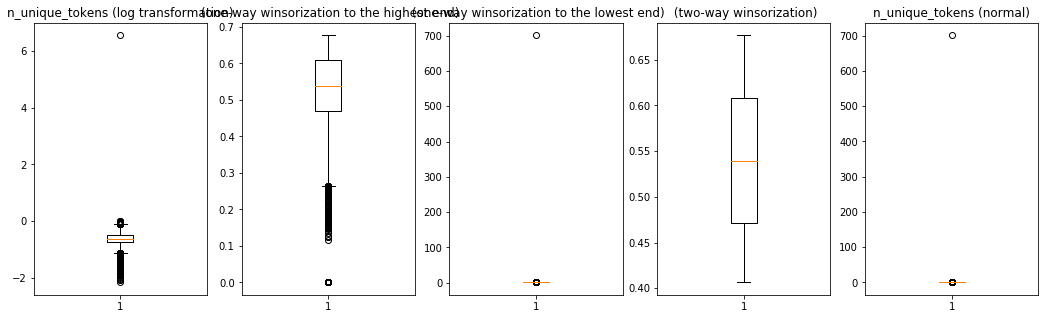

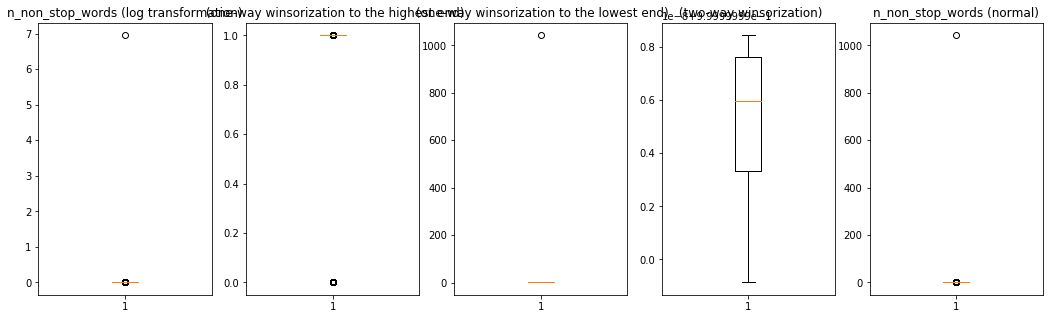

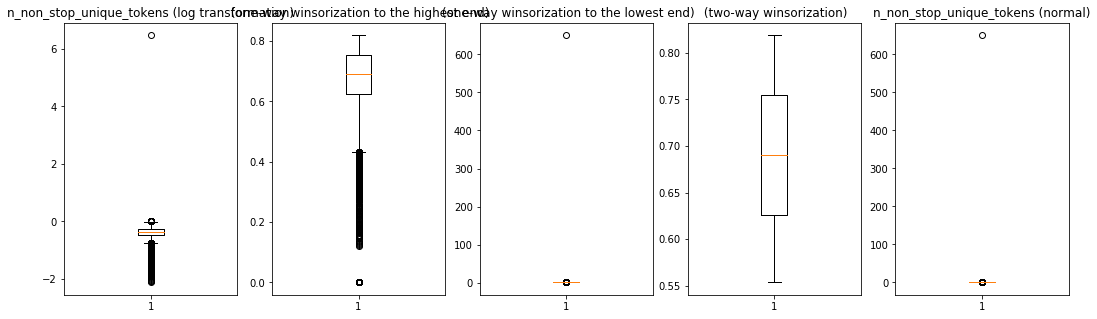

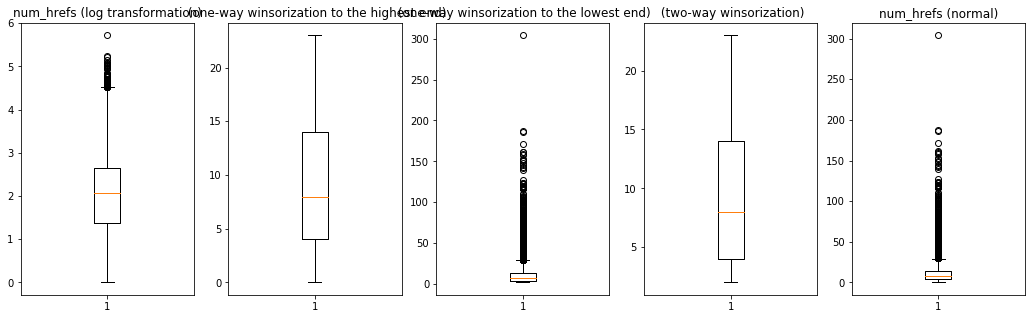

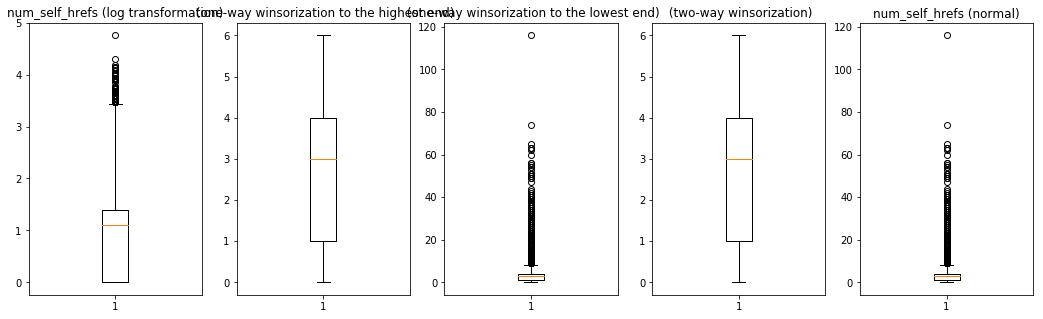

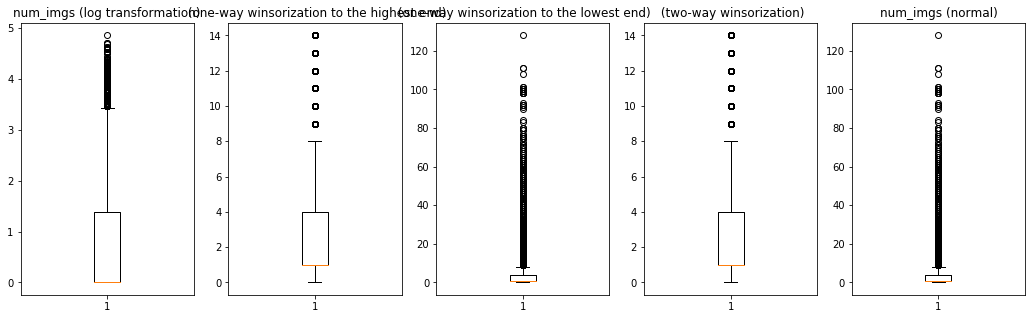

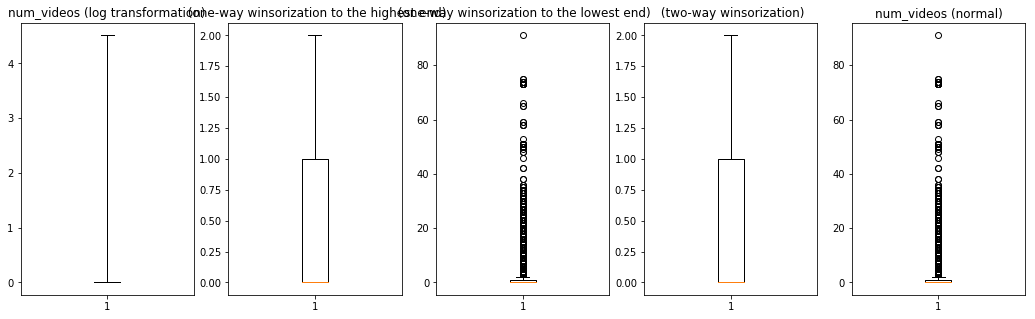

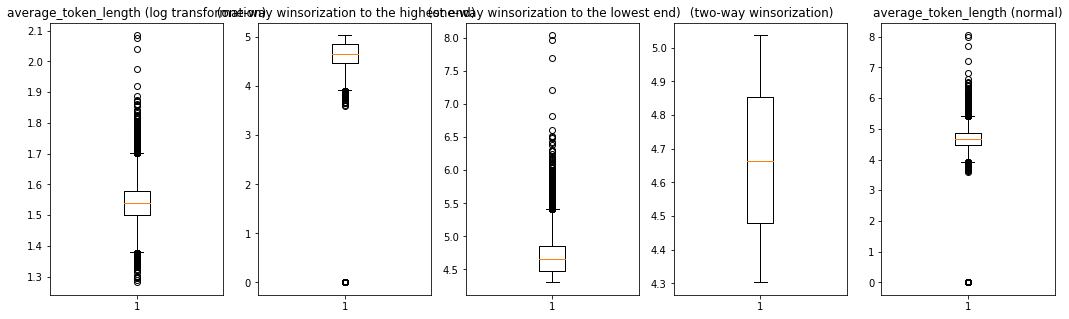

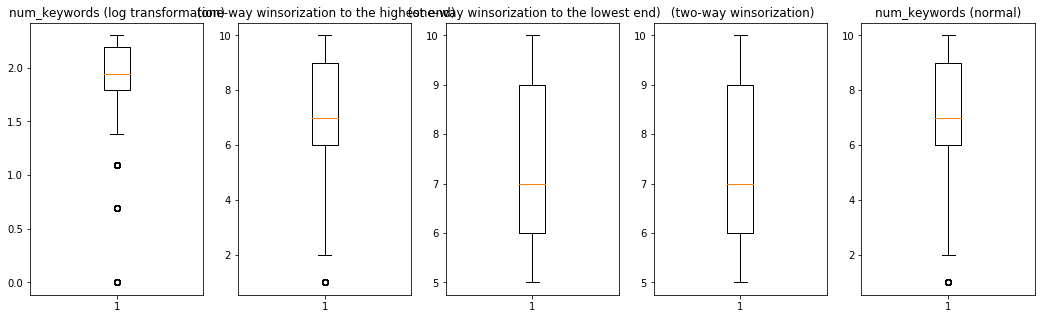

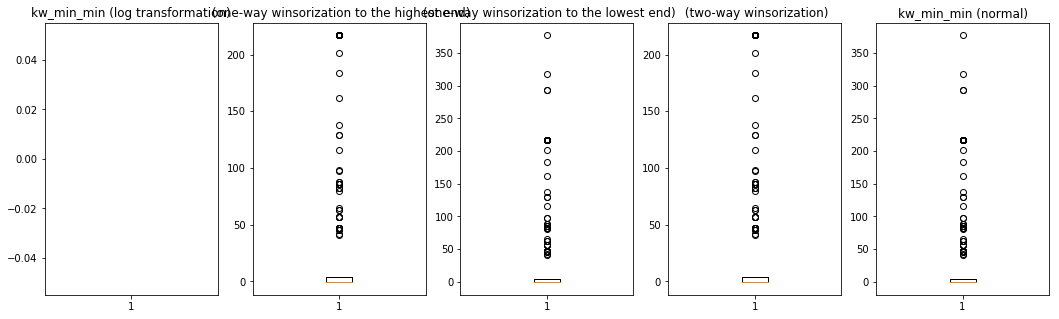

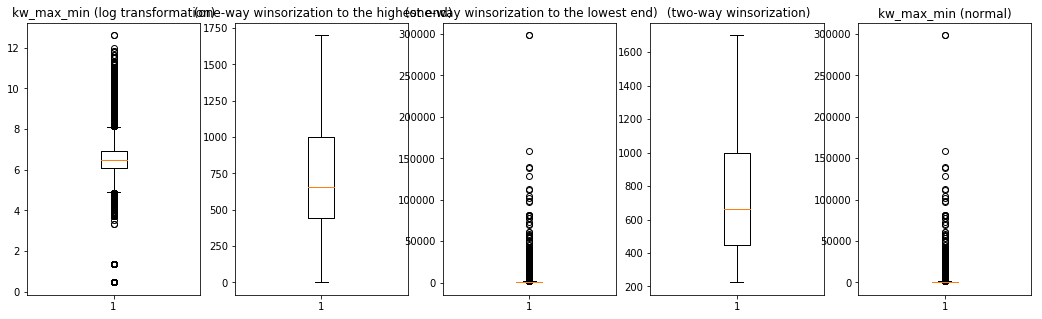

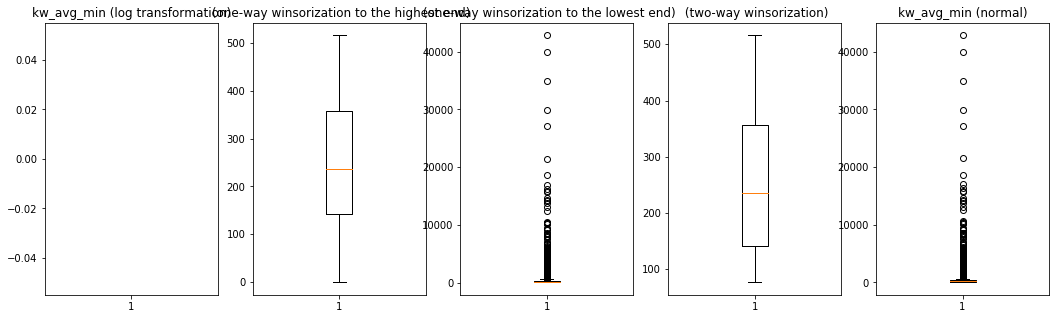

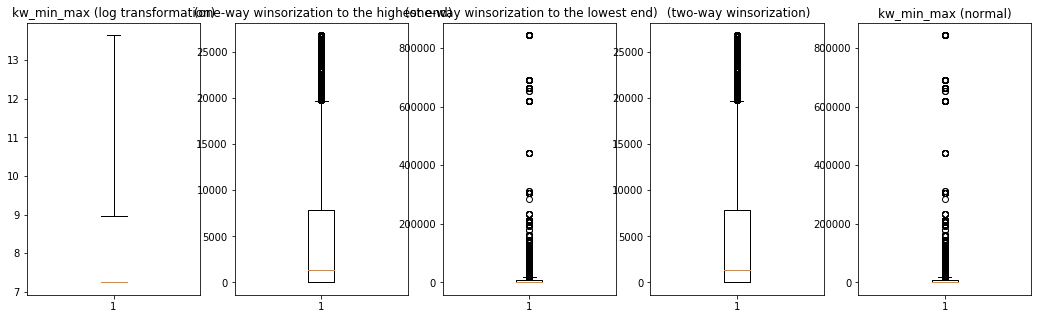

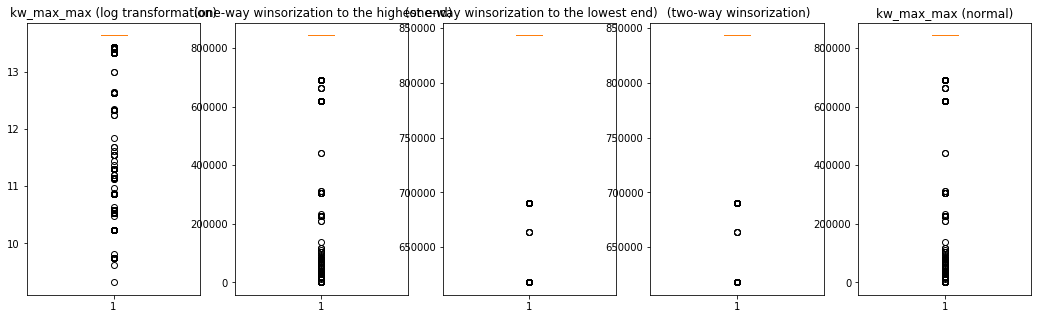

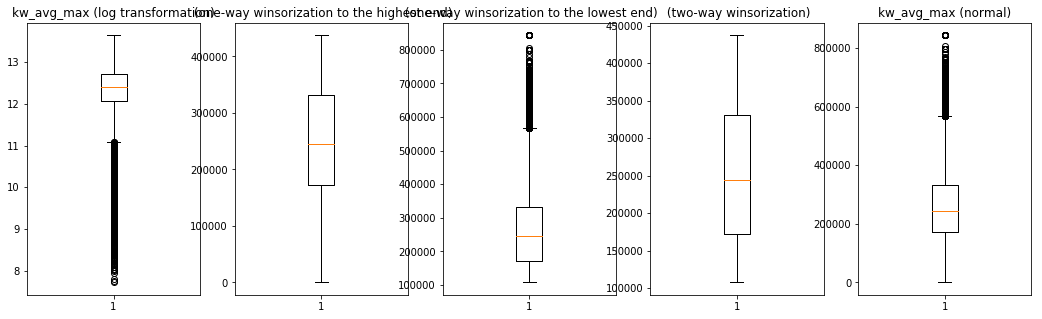

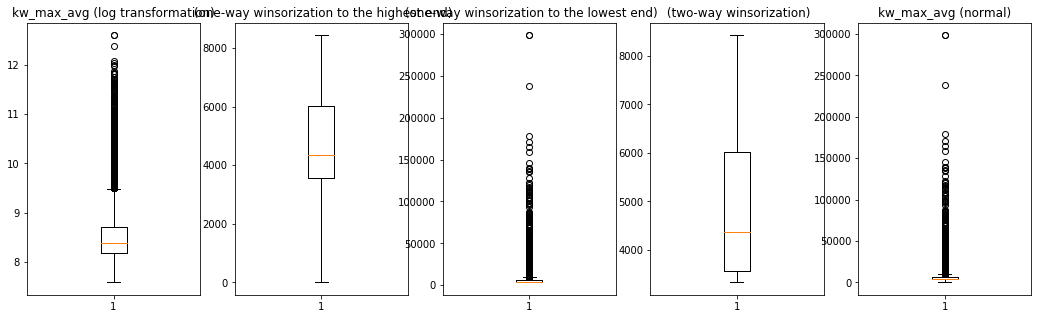

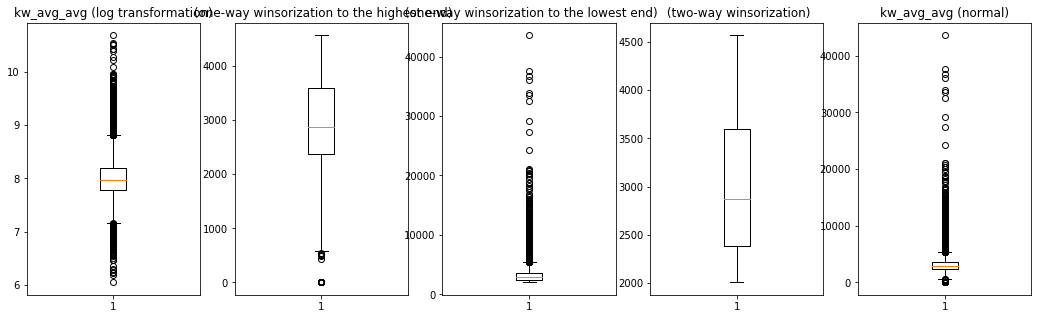

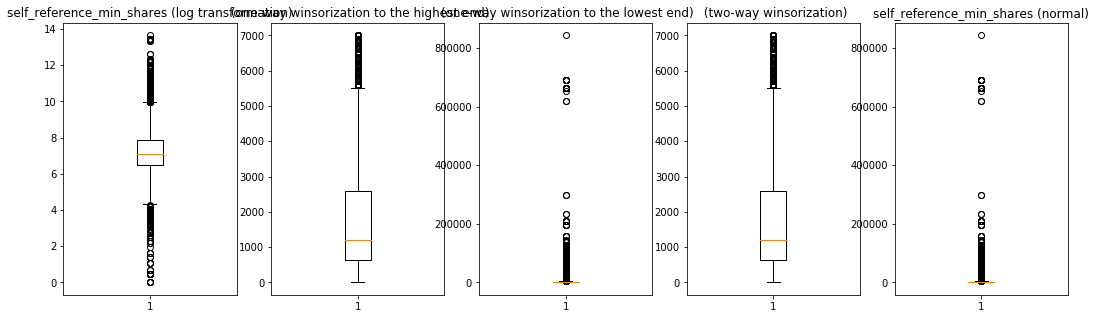

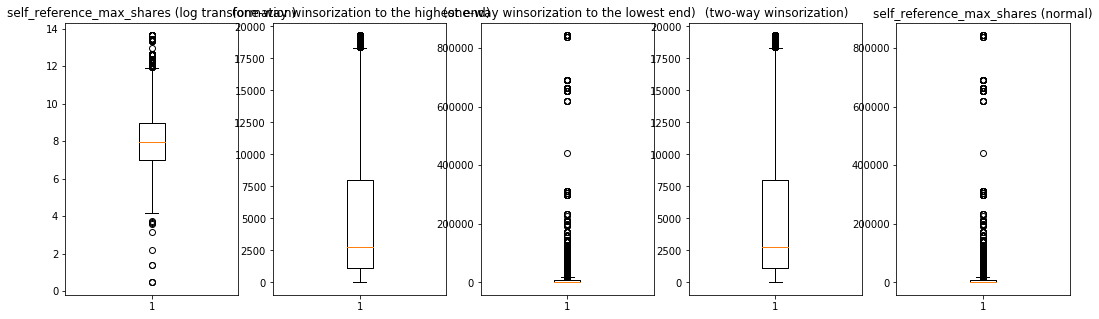

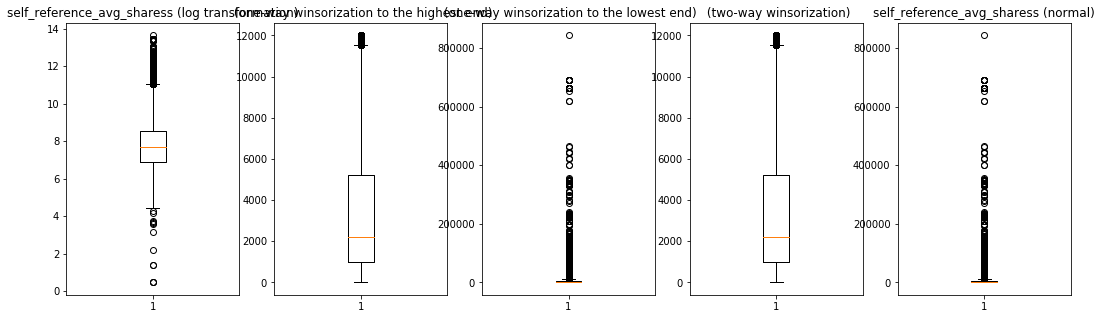

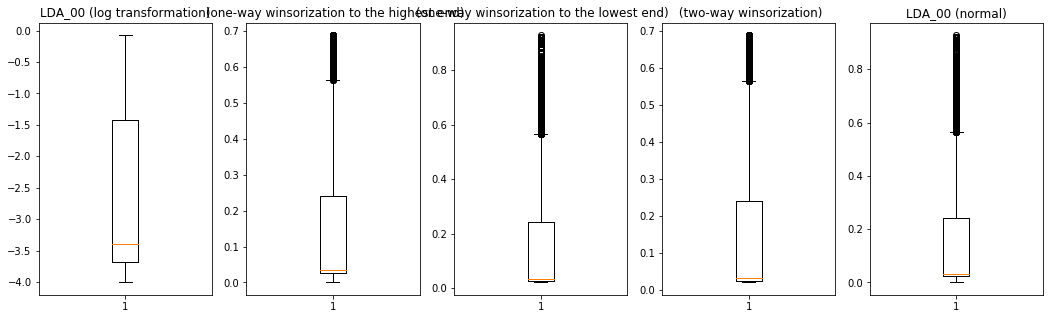

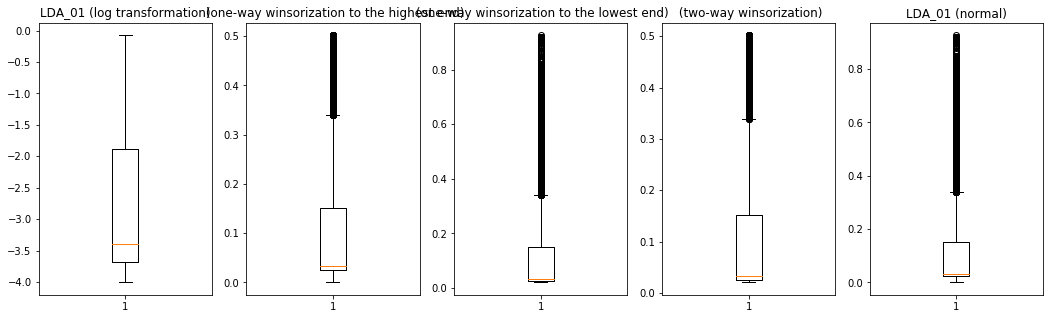

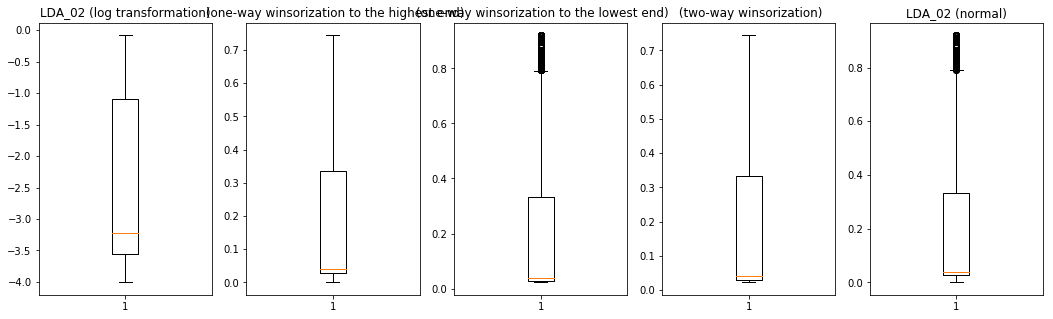

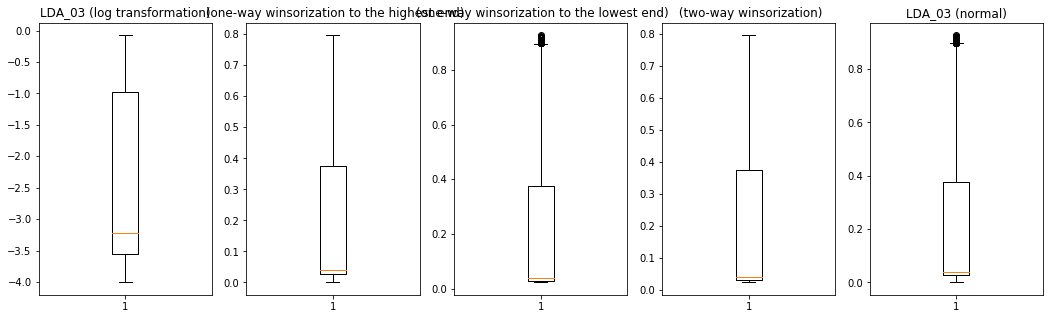

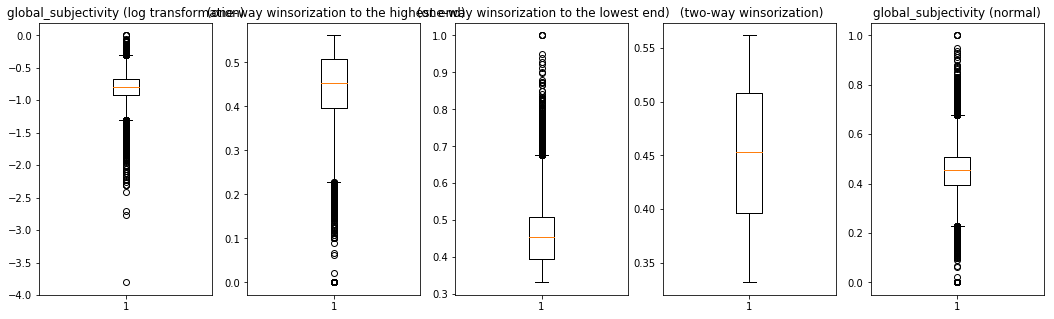

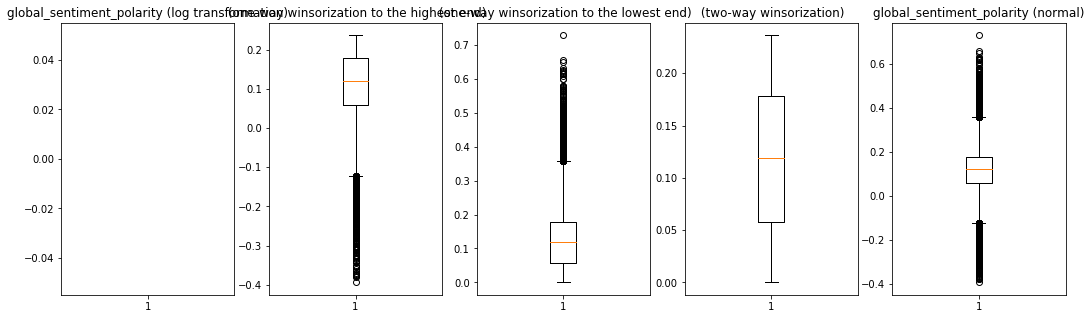

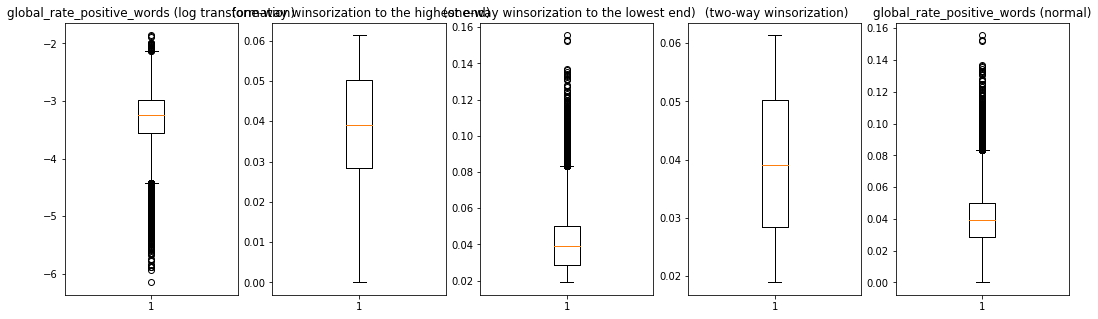

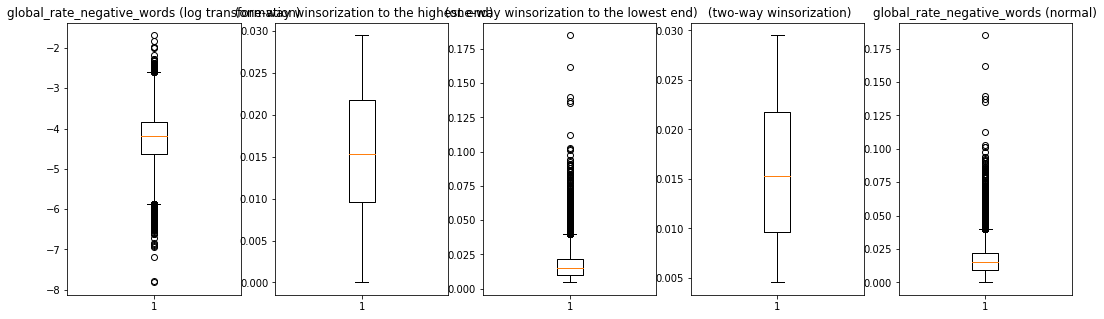

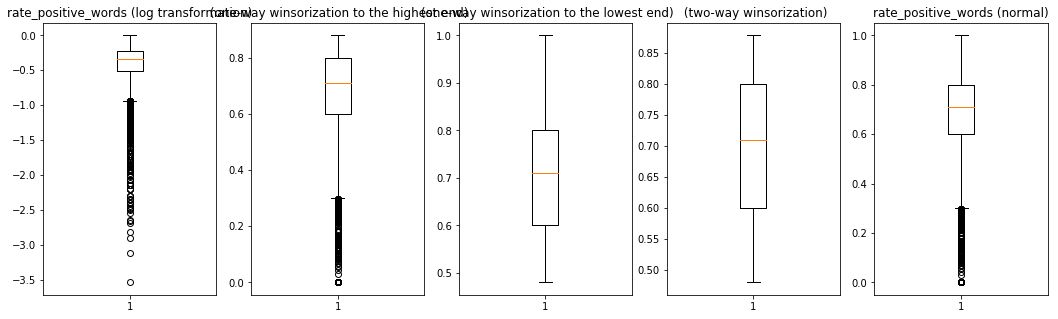

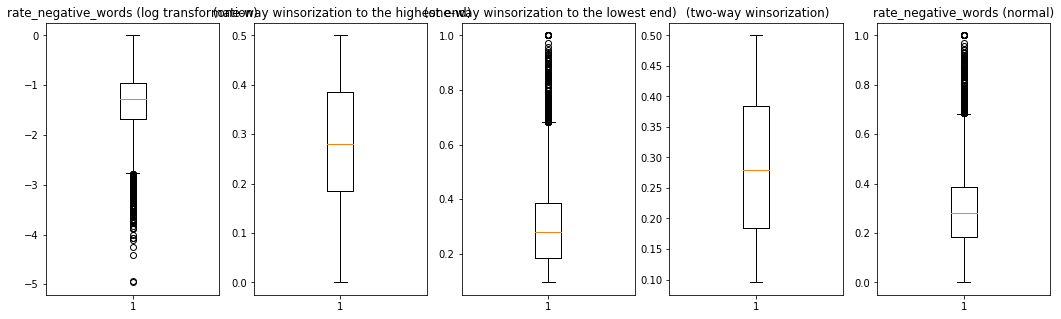

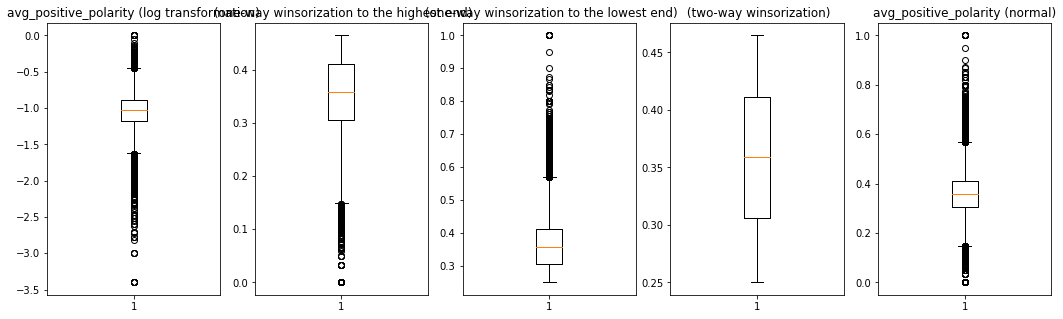

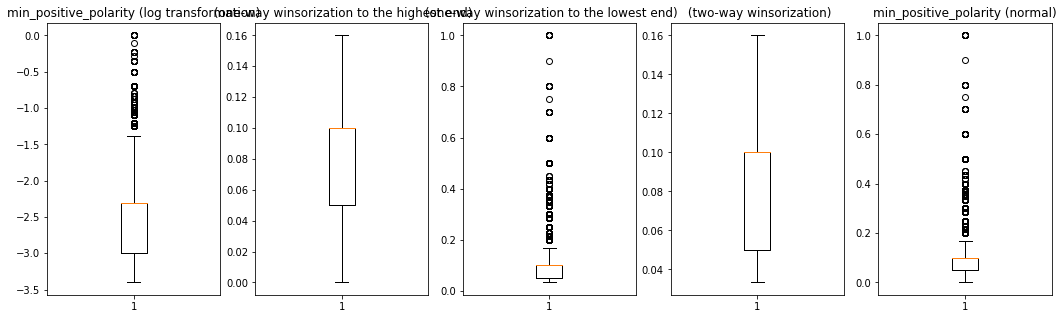

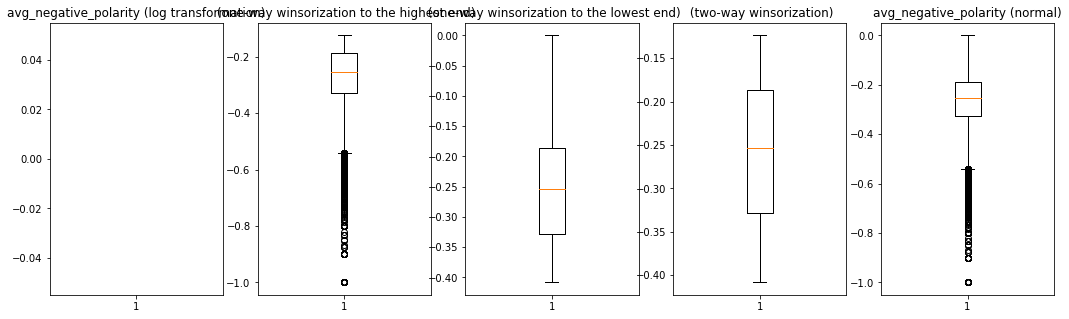

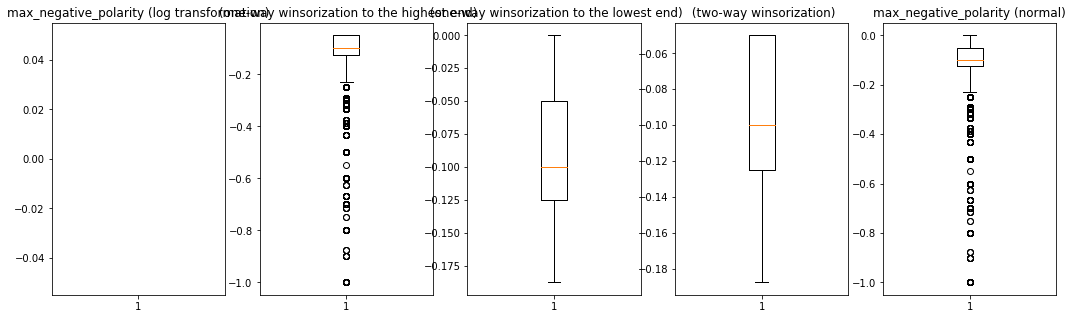

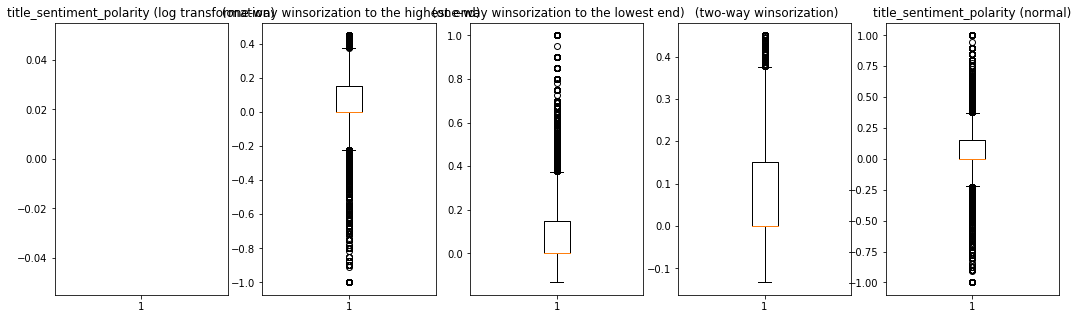

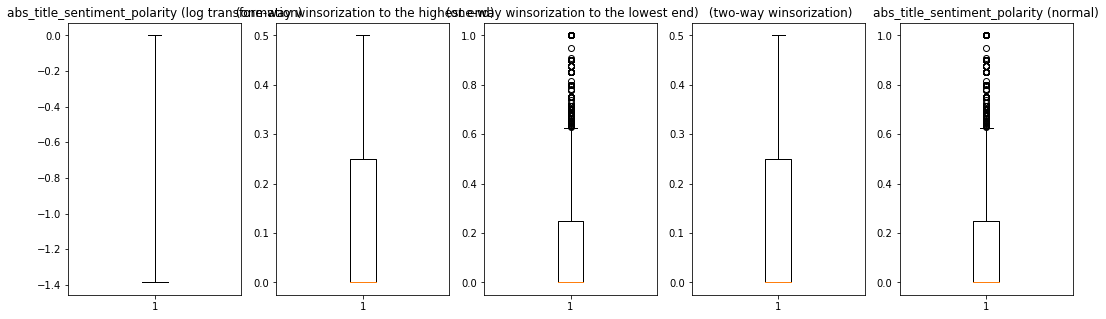

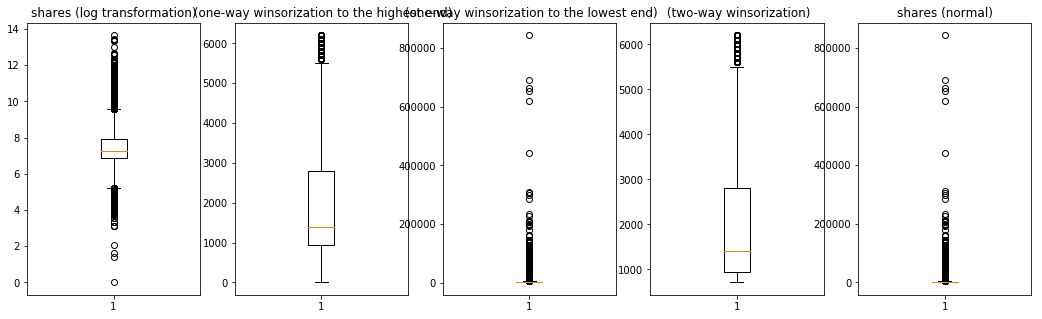

In [6]:
# Drawing 5 boxplots per row representing  same variable
# Columns from 1 to 4, are following techniques applied to the variable: 
#    log transformation,
#    one-way winsorization to the highest end,
#    one-way winsorization to the lowest end,
#    two-way winsorization,
# The last column shows a boxplot with original values  

i=0
while i < len(columns_w_outliers):

    plt.figure(figsize=(18,5), clear=True)
      
    plt.subplot(1,5,1)
    plt.boxplot(np.log(onlinenews[columns_w_outliers[i]]))
    title = str(columns_w_outliers[i]) + ' (log transformation)'
    plt.title(title)
    
    plt.subplot(1,5,2)
    plt.boxplot(winsorize(onlinenews[columns_w_outliers[i]],(0,0.10)))
    title =   ' (one-way winsorization to the highest end)'
    plt.title(title)

    plt.subplot(1,5,3)
    plt.boxplot(winsorize(onlinenews[columns_w_outliers[i]],(0.10,0)))
    title = ' (one-way winsorization to the lowest end)'
    plt.title(title)
    
    plt.subplot(1,5,4)
    plt.boxplot(winsorize(onlinenews[columns_w_outliers[i]],(0.10,0.10)))
    title =  ' (two-way winsorization)'
    plt.title(title)
    
    plt.subplot(1,5,5)
    plt.boxplot(onlinenews[columns_w_outliers[i]])
    title = str(columns_w_outliers[i]) + ' (normal)'
    plt.title(title)
    
    i+=1
    
plt.show()




### Based on visualizations above, these techniques will be applied to treat outliers:


**Techniques**

Log transformation

 - LDA_00	1
 - LDA_01	1
 - LDA_02	1
 - LDA_03	1

One-way winsorization to the highest end

  - n_tokens_content
  - num_hrefs
  - num_self_hrefs
  - num_imgs
  - num_videos
  - kw_min_min
  - kw_max_min
  - kw_avg_min
  - kw_min_max
  - kw_avg_max
  - kw_max_avg
  - self_reference_min_shares
  - self_reference_max_shares
  - self_reference_avg_sharess
  - global_rate_positive_words
  - global_rate_negative_words
  - rate_negative_words
  - min_positive_polarity
  - abs_title_sentiment_polarity

One-way winsorization to the lowest end


 - num_keywords
 - kw_max_max
 - rate_positive_words
 - avg_negative_polarity
 - max_negative_polarity
  
  
Two-way winsorization

 - n_tokens_title
 - average_token_length
 - kw_avg_avg
 - global_subjectivity
 - global_sentiment_polarity
 - avg_positive_polarity
 - title_sentiment_polarity
 
 
Drop outliers from dataset (1 row)

 - n_unique_tokens
 - n_non_stop_words
 - n_non_stop_unique_tokens
 
Conditions: values >= 200





In [7]:
#Creating a dictionary with variables and the technique for outliers
#    1 - log transformation,
#    2 - one-way winsorization to the highest end,
#    3 - one-way winsorization to the lowest end,
#    4 - two-way winsorization

transformation = {'n_tokens_title':4, 'n_tokens_content':2, 'n_unique_tokens':4, 'n_non_stop_words':3, 'n_non_stop_unique_tokens':4, 
 'num_hrefs':2, 'num_self_hrefs':2, 'num_imgs':1, 'num_videos':2, 'average_token_length':4, 
 'num_keywords':3, 'kw_min_min':2, 'kw_max_min':2, 'kw_avg_min':2, 'kw_min_max':2, 'kw_max_max':3,
 'kw_avg_max':2, 'kw_max_avg':2, 'kw_avg_avg':4, 'self_reference_min_shares':2, 'self_reference_max_shares':2, 
 'self_reference_avg_sharess':2, 'LDA_00':1, 'LDA_01':1, 'LDA_02':1, 'LDA_03':1, 'global_subjectivity':4, 
 'global_sentiment_polarity':4, 'global_rate_positive_words':2, 'global_rate_negative_words':2, 
 'rate_positive_words':3, 'rate_negative_words':2, 'avg_positive_polarity':4, 'min_positive_polarity':2, 
 'avg_negative_polarity':3, 'max_negative_polarity':3, 'title_sentiment_polarity':4, 'abs_title_sentiment_polarity':2}

In [8]:
onlinenews['n_tokens_content'].describe()

count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [9]:
onlinenews['n_tokens_content'] = winsorize(onlinenews['n_tokens_content'],(0,0.10))

In [10]:
onlinenews['n_tokens_content'].describe()

count    39644.000000
mean       495.678816
std        316.592548
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       1090.000000
Name: n_tokens_content, dtype: float64

In [11]:
#Transforming outliers
#    1 - log transformation,
#    2 - one-way winsorization to the highest end,
#    3 - one-way winsorization to the lowest end,
#    4 - two-way winsorization


#Dropping outliers from dataset (1 row) 

ind = onlinenews[onlinenews['n_unique_tokens']>200].index[0]
onlinenews = onlinenews.drop(index=ind)


for k in transformation:
    if transformation[k] == 1:
        onlinenews[k] = np.log(onlinenews[k])
        
    elif transformation[k] == 2:
        onlinenews[k] = winsorize(onlinenews[k],(0,0.10))

    elif transformation[k] == 3:
        onlinenews[k] = winsorize(onlinenews[k],(0.10,0))
        
    elif transformation[k] == 4:
        onlinenews[k] = winsorize(onlinenews[k],(0.10,0.10))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [12]:
Q1 = onlinenews.quantile(0.25)
Q3 = onlinenews.quantile(0.75)
IQR = Q3 - Q1


#Creating a dataframe with boolean values
#False that means these values are valid whereas 
#True indicates presence of an outlier

notinvalidarea = (onlinenews.drop(['url'], axis=1) < (Q1 - 1.5 * IQR)) | (onlinenews.drop(['url'], axis=1) > (Q3 + 1.5 * IQR))



columns_w_outliers = outliersinColumns(notinvalidarea)
print(columns_w_outliers)
print('\n')
print('Columns with outliers: {}'.format(len(columns_w_outliers)))



['num_imgs', 'kw_min_min', 'kw_min_max', 'kw_max_max', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'title_sentiment_polarity', 'shares']


Columns with outliers: 9


['num_imgs', 'kw_min_min', 'kw_min_max', 'kw_max_max', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'title_sentiment_polarity', 'shares']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1874: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1881: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1889: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1890: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
/Users/wendy/.local/lib/python3.7/site-packages/

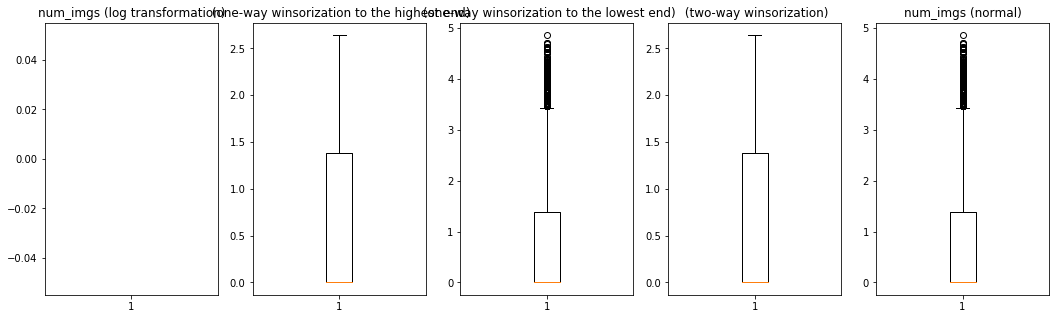

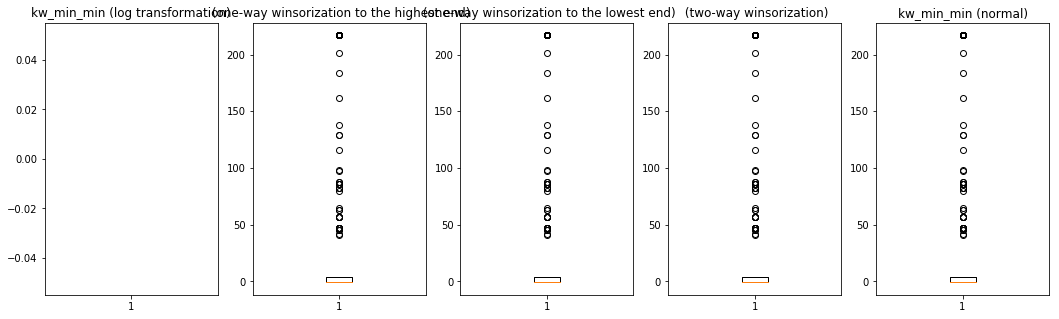

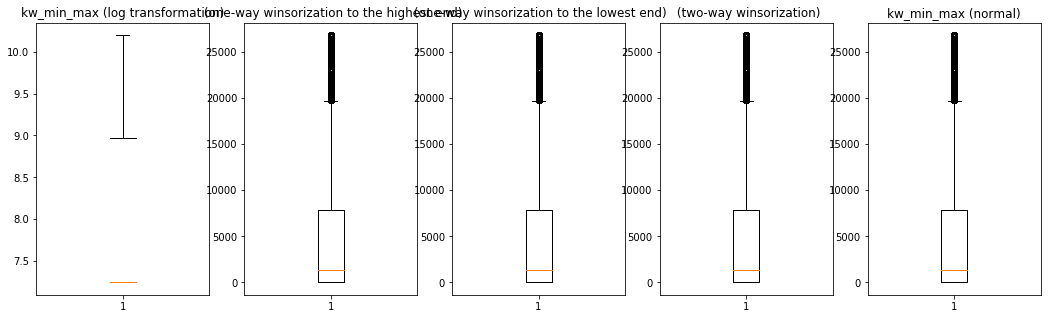

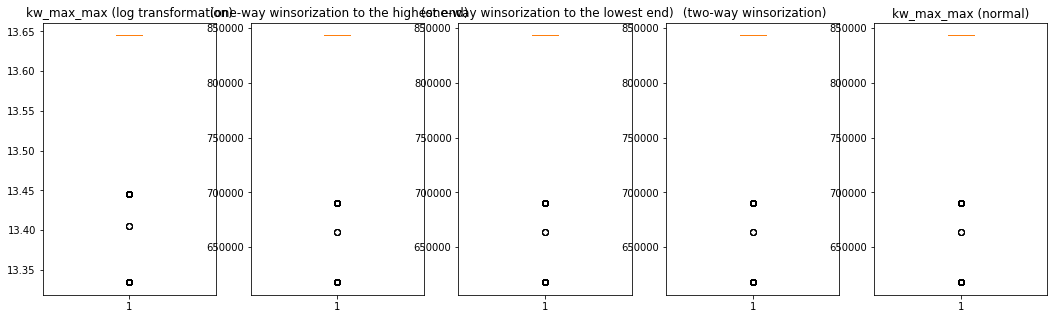

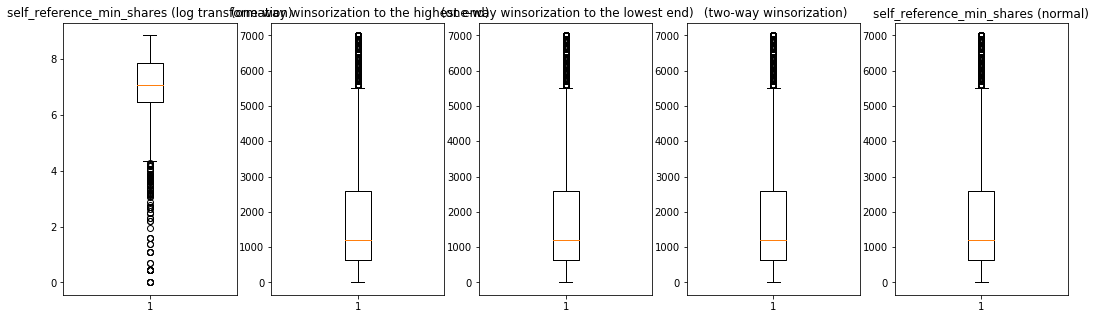

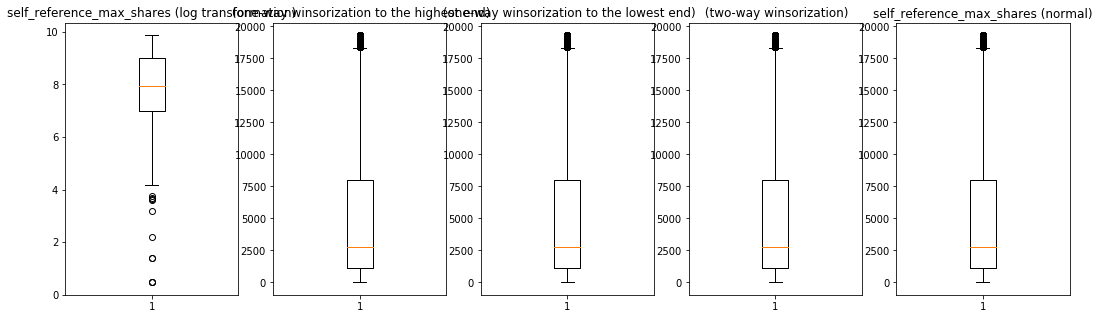

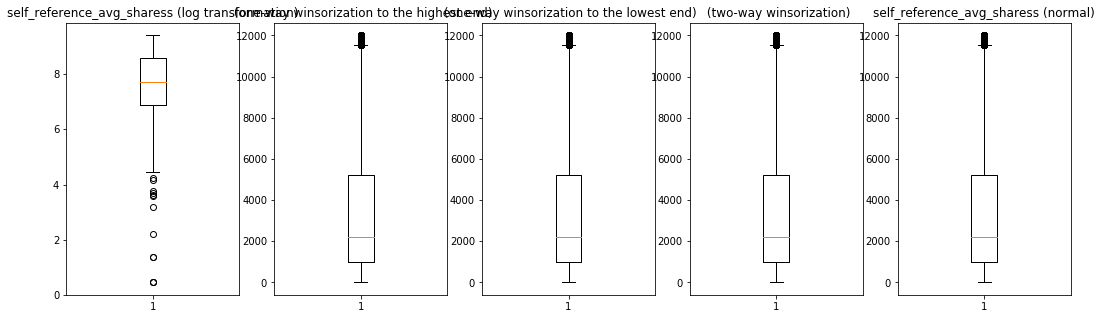

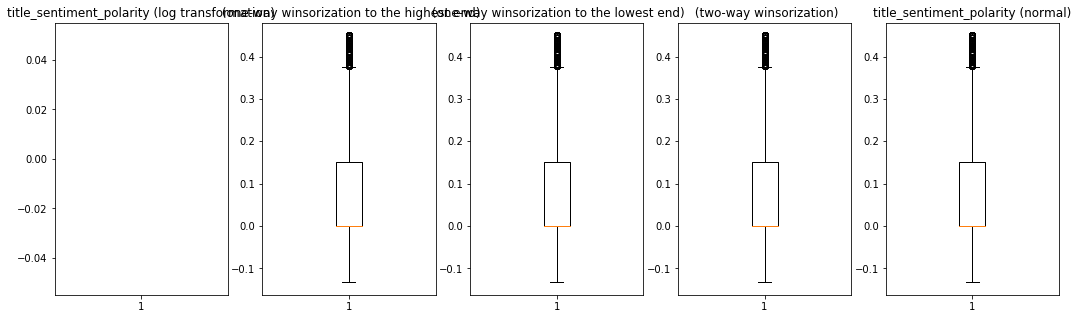

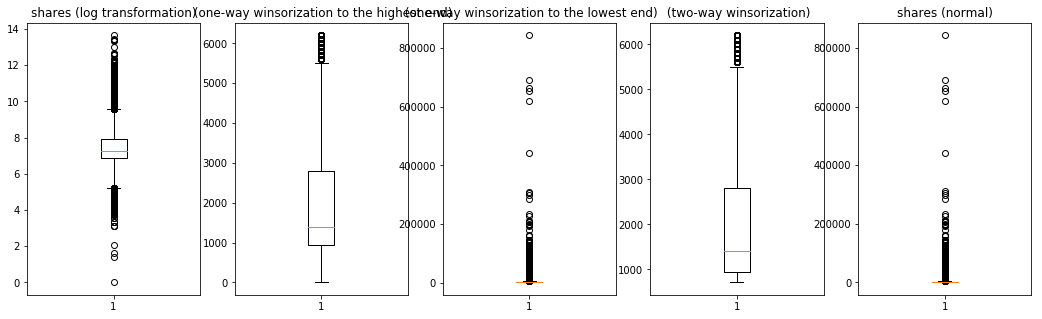

In [13]:
print(columns_w_outliers)

i=0
while i < len(columns_w_outliers):

    plt.figure(figsize=(18,5), clear=True)
      
    plt.subplot(1,5,1)
    plt.boxplot(np.log(onlinenews[columns_w_outliers[i]]))
    title = str(columns_w_outliers[i]) + ' (log transformation)'
    plt.title(title)
    
    plt.subplot(1,5,2)
    plt.boxplot(winsorize(onlinenews[columns_w_outliers[i]],(0,0.10)))
    title =   ' (one-way winsorization to the highest end)'
    plt.title(title)

    plt.subplot(1,5,3)
    plt.boxplot(winsorize(onlinenews[columns_w_outliers[i]],(0.10,0)))
    title = ' (one-way winsorization to the lowest end)'
    plt.title(title)
    
    plt.subplot(1,5,4)
    plt.boxplot(winsorize(onlinenews[columns_w_outliers[i]],(0.10,0.10)))
    title =  ' (two-way winsorization)'
    plt.title(title)
    
    plt.subplot(1,5,5)
    plt.boxplot(onlinenews[columns_w_outliers[i]])
    title = str(columns_w_outliers[i]) + ' (normal)'
    plt.title(title)
    
    i+=1
    
plt.show()



__________

By: Wendy Navarrete

August, 2019